This is the proposal interpretation of the data of CS210 project by students Sıla Kuzu, Sude Karatağ, Zeynep Dağcı.

In [92]:
import pandas as pd
import numpy as np
from os.path import join 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline
#conda install -c anaconda beautiful-soup
!pip install beautifulsoup4
!pip install requests

# importing the required libraries
from bs4 import BeautifulSoup  
import requests
from pprint import pprint  # pretty printing

In [93]:
# getting the document
res = requests.get("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp")

In [94]:
res.status_code

200

In [95]:
soup = BeautifulSoup(res.text, "html.parser") 

In [96]:
soup.find("body") 

<body>
<script>
     google.load('visualization', '1', {'packages': ['geochart']});
     google.setOnLoadCallback(drawRegionsMap);

      function drawRegionsMap() {
        var data = new google.visualization.DataTable();
        data.addColumn('string', 'Country');
        data.addColumn('number', 'Cost of Living Index');
        data.addRows([
        ['Cambodia', 46.80],
        ['Paraguay', 32.27],
        ['Kazakhstan', 29.83],
        ['Portugal', 50.39],
        ['Bahamas', 92.40],
        ['Greece', 56.66],
        ['Latvia', 49.23],
        ['Iran', 35.80],
        ['Morocco', 33.98],
        ['Panama', 51.45],
        ['Guatemala', 41.74],
        ['Iraq', 39.62],
        ['Chile', 47.73],
        ['Nepal', 29.63],
        ['Argentina', 33.09],
        ['Tanzania', 34.74],
        ['Ukraine', 27.94],
        ['Ghana', 51.13],
        ['Belize', 49.45],
        ['Bahrain', 56.71],
        ['India', 24.17],
        ['Canada', 65.01],
        ['Turkey', 35.21],
        ['Belgiu

In [97]:
res = soup.findAll("td")
res

[<td style="padding-top: 0px; padding-bottom: 7px; vertical-align: bottom;">
 <a href="https://www.numbeo.com/cost-of-living/" style="border: 0; text-decoration:none;">
 <img alt="" src="https://www.numbeo.com/images/numbeo_icon.svg" style="height: 62px; vertical-align: bottom; border: 0;"/><img alt="NUMBEO" src="https://www.numbeo.com/images/numbeo_text.svg" style="height: 34px; margin-left: 1em; margin-bottom: 8px; vertical-align: bottom; border: 0;"/></a>
 </td>,
 <td style="padding-left:8px; padding-top: 0px; padding-bottom: 0px; vertical-align: middle; width: 680px; text-align: right;">
 <div style="display: inline-block; width: 100%; margin-top: 10px; margin-bottom: 10px; text-align: right; vertical-align: bottom">
 <nav style="display: inline-block; vertical-align: middle; padding-left: 0.5em;">
 <div class="standard_margin_inlineblock">
 <select class="result_switcher " id="city_result_switcher" name="city_result_switcher" onchange="window.location = this.value;">
 <option sele

In [98]:
tables = soup.findAll("table")
tables

[<table style="border-spacing: 0px; width: 100%; margin-top: 7px; margin-bottom: 1px;">
 <tr>
 <td style="padding-top: 0px; padding-bottom: 7px; vertical-align: bottom;">
 <a href="https://www.numbeo.com/cost-of-living/" style="border: 0; text-decoration:none;">
 <img alt="" src="https://www.numbeo.com/images/numbeo_icon.svg" style="height: 62px; vertical-align: bottom; border: 0;"/><img alt="NUMBEO" src="https://www.numbeo.com/images/numbeo_text.svg" style="height: 34px; margin-left: 1em; margin-bottom: 8px; vertical-align: bottom; border: 0;"/></a>
 </td>
 <td style="padding-left:8px; padding-top: 0px; padding-bottom: 0px; vertical-align: middle; width: 680px; text-align: right;">
 <div style="display: inline-block; width: 100%; margin-top: 10px; margin-bottom: 10px; text-align: right; vertical-align: bottom">
 <nav style="display: inline-block; vertical-align: middle; padding-left: 0.5em;">
 <div class="standard_margin_inlineblock">
 <select class="result_switcher " id="city_result_

In [99]:
tbody = soup.find("tbody")
tbody

<tbody>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Switzerland</td>
<td style="text-align: right">121.16</td>
<td style="text-align: right">50.25</td>
<td style="text-align: right">87.11</td>
<td style="text-align: right">120.81</td>
<td style="text-align: right">123.09</td>
<td style="text-align: right">129.70</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Iceland</td>
<td style="text-align: right">101.86</td>
<td style="text-align: right">48.28</td>
<td style="text-align: right">76.13</td>
<td style="text-align: right">92.10</td>
<td style="text-align: right">111.85</td>
<td style="text-align: right">91.80</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Norway</td>
<td style="text-align: right">100.99</td>
<td style="text-align: right">37.28</td>
<td style="text-align: right">70.40</td>
<td style="text-align: right">92.67</td>
<td style="text-align: right">111.53</td>
<td styl

In [100]:
def get_entries(table):
    """
    given a table, returns the attributes in each row
    """
    storage = []
    for entry in table.findAll("tr"):
        element = []
        for row in entry.findAll("td"):
            if row.text != "":  # just to avoid the empty string
                element.append(row.text)
        storage.append(element)
                
    return storage


In [101]:
raw_table = get_entries(tbody)
raw_table

[['Switzerland', '121.16', '50.25', '87.11', '120.81', '123.09', '129.70'],
 ['Iceland', '101.86', '48.28', '76.13', '92.10', '111.85', '91.80'],
 ['Norway', '100.99', '37.28', '70.40', '92.67', '111.53', '103.61'],
 ['Bahamas', '92.40', '33.49', '64.11', '76.97', '99.92', '57.01'],
 ['Luxembourg', '86.09', '55.64', '71.47', '75.10', '96.08', '106.26'],
 ['Japan', '83.33', '27.97', '56.75', '83.58', '48.75', '103.12'],
 ['Denmark', '81.38', '32.91', '58.11', '63.62', '95.14', '114.39'],
 ['Hong Kong', '78.14', '76.83', '77.51', '80.30', '56.08', '69.34'],
 ['South Korea', '76.93', '22.23', '50.66', '89.70', '44.84', '103.40'],
 ['Ireland', '75.35', '41.80', '59.24', '59.10', '82.65', '95.09'],
 ['France', '74.85', '26.25', '51.51', '68.31', '75.37', '91.55'],
 ['Netherlands', '74.83', '34.74', '55.58', '58.80', '83.49', '102.54'],
 ['Israel', '74.28', '29.42', '52.74', '61.92', '80.83', '92.48'],
 ['Belgium', '72.97', '25.81', '50.32', '60.86', '83.40', '95.09'],
 ['Finland', '72.82', 

In [102]:
cols = ["Country","Cost of Living Index","Rent Index"]
df = pd.DataFrame(raw_table, columns=cols)

AssertionError: 3 columns passed, passed data had 7 columns

In [103]:
df.head()

,Country,Cost of Living Index,Rent Index
0,Venezuela,83.23,16.77
1,Papua New Guinea,79.88,20.12
2,Honduras,76.84,23.16
3,South Africa,76.80,23.20
4,Afghanistan,76.63,23.37


ValueError: color kwarg must have one color per data set. 118 data sets and 1 colors were provided

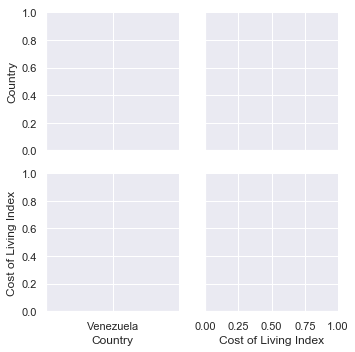

In [104]:
cols2plot = ["Country", "Cost of Living Index"]

sns.pairplot(data=df, vars=cols2plot)
plt.plot()

In [105]:
df.describe()

,Country,Cost of Living Index,Rent Index
count,118,118,118
unique,118,114,114
top,Qatar,65.28,34.72
freq,1,2,2


In [106]:
df_list[0]

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,Switzerland,121.16,50.25,87.11,120.81,123.09,129.70
1,NaN,Iceland,101.86,48.28,76.13,92.10,111.85,91.80
2,NaN,Norway,100.99,37.28,70.40,92.67,111.53,103.61
3,NaN,Bahamas,92.40,33.49,64.11,76.97,99.92,57.01
4,NaN,Luxembourg,86.09,55.64,71.47,75.10,96.08,106.26
5,NaN,Japan,83.33,27.97,56.75,83.58,48.75,103.12
6,NaN,Denmark,81.38,32.91,58.11,63.62,95.14,114.39
7,NaN,Hong Kong,78.14,76.83,77.51,80.30,56.08,69.34
8,NaN,South Korea,76.93,22.23,50.66,89.70,44.84,103.40
9,NaN,Ireland,75.35,41.80,59.24,59.10,82.65,95.09


In [107]:
df_list[0].head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,Switzerland,121.16,50.25,87.11,120.81,123.09,129.70
1,NaN,Iceland,101.86,48.28,76.13,92.10,111.85,91.80
2,NaN,Norway,100.99,37.28,70.40,92.67,111.53,103.61
3,NaN,Bahamas,92.40,33.49,64.11,76.97,99.92,57.01
4,NaN,Luxembourg,86.09,55.64,71.47,75.10,96.08,106.26


In [108]:
df_list[0].drop("Rank", axis=1).head()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,121.16,50.25,87.11,120.81,123.09,129.70
1,Iceland,101.86,48.28,76.13,92.10,111.85,91.80
2,Norway,100.99,37.28,70.40,92.67,111.53,103.61
3,Bahamas,92.40,33.49,64.11,76.97,99.92,57.01
4,Luxembourg,86.09,55.64,71.47,75.10,96.08,106.26


In [109]:
options = soup.find("select", {"name": "title"}).findAll("option")
options

[<option selected="selected" value="2019">2019</option>,
 <option value="2018-mid">2018 Mid-Year</option>,
 <option value="2018">2018</option>,
 <option value="2017-mid">2017 Mid-Year</option>,
 <option value="2017">2017</option>,
 <option value="2016-mid">2016 Mid-Year</option>,
 <option value="2016">2016</option>,
 <option value="2015-mid">2015 Mid-Year</option>,
 <option value="2015">2015</option>,
 <option value="2014-mid">2014 Mid-Year</option>,
 <option value="2014">2014</option>,
 <option value="2013">2013</option>,
 <option value="2012">2012</option>,
 <option value="2011">2011</option>,
 <option value="2010">2010</option>,
 <option value="2009">2009</option>]

In [110]:
years = []
for option in options:
    years.append(option["value"])  # get the value tag

In [111]:
years

['2019',
 '2018-mid',
 '2018',
 '2017-mid',
 '2017',
 '2016-mid',
 '2016',
 '2015-mid',
 '2015',
 '2014-mid',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009']